<a href="https://colab.research.google.com/github/RakshithaMaddala/OIBSIP/blob/main/retail_stores_sales_data_oasis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [ ]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns',None)

In [ ]:
#data loading

In [ ]:
df=pd.read_csv("/content/sample_data/retail_store_sales.csv")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [ ]:
print(df.isnull().sum())
print(df.info())
print(df.describe())

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   

In [ ]:
print('shape of dataset:',df.shape)
print("\n column name:",df.columns.tolist())
print("\n data types:\n",df.dtypes)
print("\n missing values:\n",df.isnull().sum())
print("\n duplicate rows:",df.duplicated().sum())
print("\n summary statistics:\n",df.describe(include='all'))

df.drop_duplicates(inplace=True)


shape of dataset: (12575, 11)

 column name: ['Transaction ID', 'Customer ID', 'Category', 'Item', 'Price Per Unit', 'Quantity', 'Total Spent', 'Payment Method', 'Location', 'Transaction Date', 'Discount Applied']

 data types:
 Transaction ID       object
Customer ID          object
Category             object
Item                 object
Price Per Unit      float64
Quantity            float64
Total Spent         float64
Payment Method       object
Location             object
Transaction Date     object
Discount Applied     object
dtype: object

 missing values:
 Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

 duplicate rows: 0

 summary statistics:
        Transaction ID Customer ID                       Category        Item  \
count           125

In [ ]:
print(df.isnull().sum())

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64


In [ ]:
#data Cleaning

In [ ]:
if 'Transaction Date' in df.columns:
  df['Transaction Date']=pd.to_datetime(df['Transaction Date'],errors='coerce')

In [ ]:
df["Item"] = df["Item"].fillna(df["Item"].mode()[0])
df["Quantity"] = df["Quantity"].fillna(math.floor(df["Quantity"].median()))
df["Total Spent"] = df["Total Spent"].fillna(math.floor(df["Total Spent"].median()))
df["Price Per Unit"] = df["Total Spent"] / df["Quantity"]
df["Discount Applied"] = df["Discount Applied"].fillna(df["Discount Applied"].mode()[0])
print(df.isna().sum())

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64


/tmp/ipython-input-1676331908.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Discount Applied"] = df["Discount Applied"].fillna(df["Discount Applied"].mode()[0])


In [ ]:

# for col in df.select_dtypes(include=np.number).columns:
#   df[col]=df[col].fillna(df[col].median(),inplace=True)

# # Columns to convert to category
# cols_to_cat = ['Transaction ID', 'Customer ID', 'Category', 'Item', 'Payment Method', 'Location', 'Discount Applied']
# df[cols_to_cat] = df[cols_to_cat].astype('category')
# print(df.dtypes)
# # Fill missing categorical columns with mode
# for col in cols_to_cat:
#     mode_val = df[col].mode()
#     if not mode_val.empty:
#         if mode_val[0] not in df[col].cat.categories:
#             df[col] = df[col].cat.add_categories(mode_val[0])
#         df[col] = df[col].fillna(mode_val[0])

# # Step 7: Fill missing object columns with mode (should be none if category converted)
# obj_cols = df.select_dtypes(include='object').columns
# for col in obj_cols:
#     mode_val = df[col].mode()
#     if not mode_val.empty:
#         df[col] = df[col].fillna(mode_val[0])
# print(df.select_dtypes(include='category').columns)
# print("After cleaning:")
# print(df.isnull().sum())


In [ ]:
# Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).

In [ ]:
print("Numeric columns in dataset:")
print(df.select_dtypes(include=['float64', 'int64']).columns)

# Choose the main column representing sales amount
col = 'Total Spent'  # change this if yours is different

print(f"\nMean of {col}: {df[col].mean():.2f}")
print(f"Median of {col}: {df[col].median():.2f}")
print(f"Mode of {col}: {df[col].mode()[0]:.2f}")
print(f"Standard Deviation of {col}: {df[col].std():.2f}")

# Summary statistics
print("\nDescriptive summary:")
display(df.describe())


Numeric columns in dataset:
Index(['Price Per Unit', 'Quantity', 'Total Spent'], dtype='object')

Mean of Total Spent: 128.61
Median of Total Spent: 108.00
Mode of Total Spent: 108.00
Standard Deviation of Total Spent: 92.56

Descriptive summary:


,Price Per Unit,Quantity,Total Spent
count,12575.000000,12575.000000,12575.000000
mean,23.103380,5.558648,128.612565
std,10.543226,2.790160,92.562867
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,55.000000
50%,23.000000,6.000000,108.000000
75%,32.000000,8.000000,184.000000
max,41.000000,10.000000,410.000000


In [ ]:
# Time Series Analysis: Analyze sales trends over time using time series techniques.

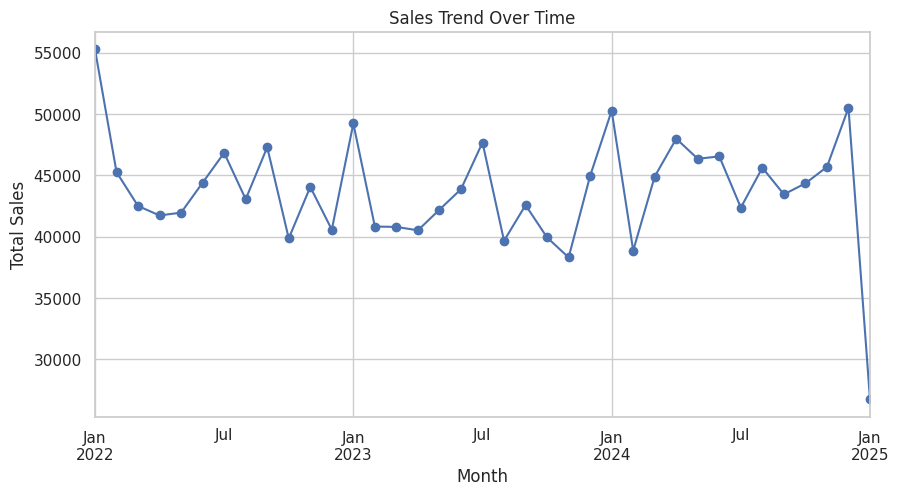

In [ ]:
# Time Series Analysis: Analyze sales trends over time using time series techniques.
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
sales_over_time = df.groupby(df['Transaction Date'].dt.to_period('M'))['Total Spent'].sum()

# Plot trend
sales_over_time.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
# Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

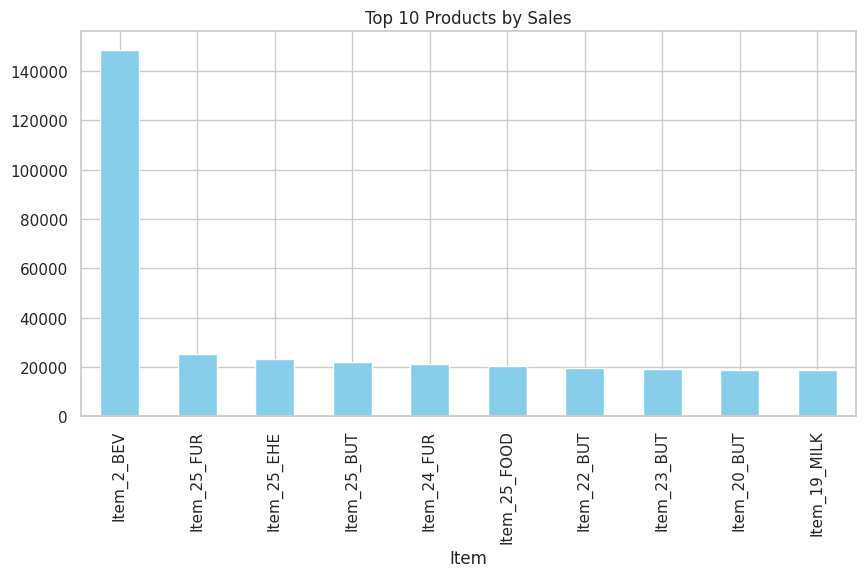

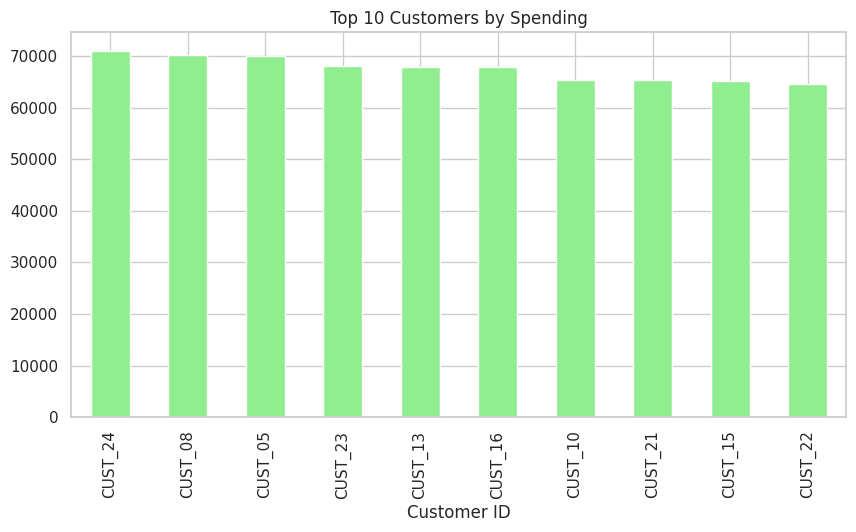

In [ ]:
# Top 10 products by sales
top_products = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='skyblue', figsize=(10,5), title='Top 10 Products by Sales')
plt.show()

# Top 10 customers by total spending
top_customers = df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='bar', color='lightgreen', figsize=(10,5), title='Top 10 Customers by Spending')
plt.show()



In [ ]:
# Visualization: Present insights through bar charts, line plots, and heatmaps.

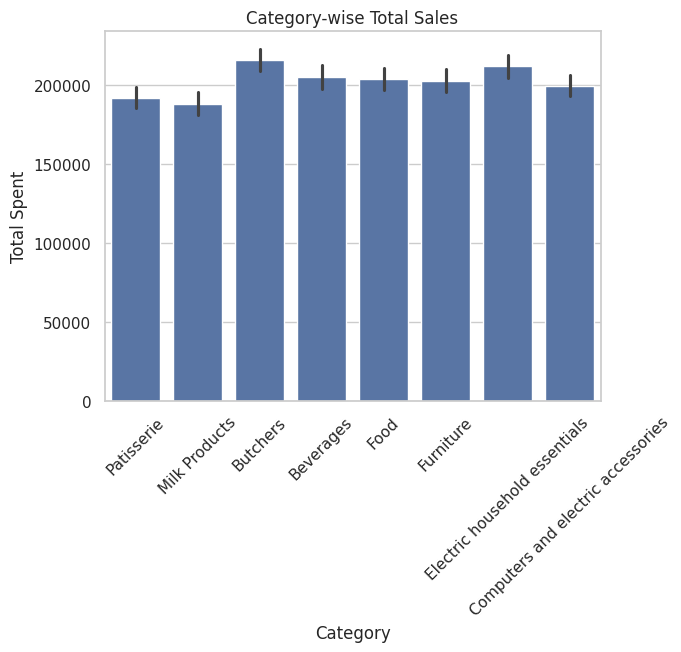

Numeric columns used for correlation:
Index(['Price Per Unit', 'Quantity', 'Total Spent'], dtype='object')


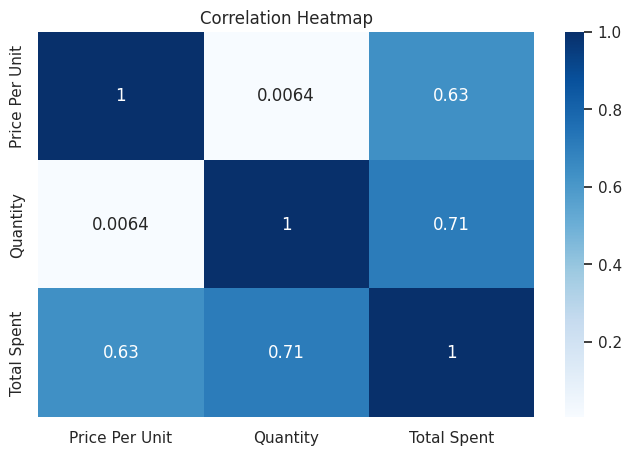

In [ ]:
# Bar chart - category-wise sales
sns.barplot(x='Category', y='Total Spent', data=df, estimator=sum)
plt.title('Category-wise Total Sales')
plt.xticks(rotation=45)  #Rotates the x-axis labels by 45°
plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Check what numeric columns we have
print("Numeric columns used for correlation:")
print(numeric_df.columns)
# Plot the heatmap safely
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
top_products = df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(5)
print(top_products)

Item
Item_2_BEV     148698.5
Item_25_FUR     25256.0
Item_25_EHE     23083.0
Item_25_BUT     21894.0
Item_24_FUR     21172.0
Name: Total Spent, dtype: float64


In [ ]:
payment_counts = df['Payment Method'].value_counts()
print(payment_counts)


Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64


In [ ]:
# Recommendations: Provide actionable recommendations based on the EDA.

In [ ]:
# Key Insights from Retail Sales Data:

# 1. Category Performance
# Butchers category generates the highest revenue → focus promotions and stock management here.
# Milk products generate the lowest revenue → consider promotions, discounts, or review stock/pricing.

# 2. Customer Contribution
# Few customers contribute most of the revenue → these are your top spenders.
# Actionable: Introduce loyalty programs or personalized offers to retain them.

# 3. Time/Seasonal Trends
# Sales peak in January, possibly due to start-of-year demand.
# Actionable: Increase inventory and marketing campaigns during this period to maximize revenue.

# 4. Payment Preferences
# Most customers prefer digital payments (Digital Wallets + Credit Cards) over cash.
# Actionable: Ensure smooth digital payment options and consider small incentives to encourage digital payments.